In [4]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('/Users/aayushsahire/Downloads/churn_prediction.csv')

In [5]:
data.shape

(28382, 21)

In [6]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [7]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [7]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [6]:
data.dtypes[data.dtypes=='int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

In [7]:
#converting customer and branch_code into category
data['churn']=data['churn'].astype('category')
data['branch_code']=data['branch_code'].astype('category')
data['customer_nw_category']=data['customer_nw_category'].astype('category')
data.dtypes[data.dtypes=='int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

In [8]:
#float data types

data.dtypes[data.dtypes=='float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

In [9]:
#changing dependents to int
data['city']=data['city'].astype('category')

In [10]:
data['dependents']=data['dependents'].astype('Int64')

In [11]:
#object datatypes

data.dtypes[data.dtypes=='object']

gender              object
occupation          object
last_transaction    object
dtype: object

In [12]:
#mannualy checking

data[['gender','occupation','last_transaction']].head(7)

,gender,occupation,last_transaction
0,Male,self_employed,2019-05-21
1,Male,self_employed,2019-11-01
2,Male,salaried,NaT
3,NaN,self_employed,2019-08-06
4,Male,self_employed,2019-11-03
5,Female,self_employed,2019-11-01
6,Male,retired,2019-09-24


In [13]:
#converting gender and occupation to categorical

data['gender']=data['gender'].astype('category')
data['occupation']=data['occupation'].astype('category')
#check
data[['gender','occupation']].dtypes

gender        category
occupation    category
dtype: object

In [14]:
#converting last_transaction into date time function
date=pd.DatetimeIndex(data['last_transaction'])

In [15]:
#day of year
data['doy_Is_tran']=date.dayofyear
#week of year
data['woy_Is_tran']=date.weekofyear
#month
data['moy_Is_tran']=date.month
#day of week
data['dow_Is_tran']=date.dayofweek


In [16]:
data[['doy_Is_tran','woy_Is_tran','moy_Is_tran','dow_Is_tran']].head()

,doy_Is_tran,woy_Is_tran,moy_Is_tran,dow_Is_tran
0,141.0,21.0,5.0,1.0
1,305.0,44.0,11.0,4.0
2,NaN,NaN,NaN,NaN
3,218.0,32.0,8.0,1.0
4,307.0,44.0,11.0,6.0


## Univerate analysis

In [17]:
data.select_dtypes(include=['int64','float64','Int64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_Is_tran                       float64
woy_Is_tran                       float64
moy_Is_tran                       float64
dow_Is_tran                       float64
dtype: object

In [18]:
#segregating numerical values into groups

customer_details=['customer_id','age','vintage']
current_month=['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month=['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters=['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date=['doy_Is_tran','woy_Is_tran','moy_Is_tran','dow_Is_tran']

In [19]:
#custom function for easy and Efficient analysis of univariate 

def UVA_numeric(data,var_group):
    size=len(var_group)
    plt.figure(figsize=(7*size,3),dpi=100)
#looping for each variable
    for j,i in enumerate(var_group):
        
    #calculating discriptives of variable
        mini=data[i].min()
        maxi=data[i].max()
        mean=data[i].mean()
        median=data[i].median()
        std_dev=data[i].std()
        skew=data[i].skew()
        kurt=data[i].kurtosis()
    #calculating points of standard deviation
        points=mean-std_dev,mean+std_dev
    #plotting the variable with every information 
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i],shade=True)
        sns.lineplot(points,[0,0],color='black',label="std_dev")
        sns.scatterplot([mini,maxi],[0,0],color='orange',label="min/max")
        sns.scatterplot([mean],[0],color='red',label="mean")
        sns.scatterplot([median],[0],color='blue',label="median")
        plt.xlabel('{}'.format(i),fontsize=20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

In [17]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

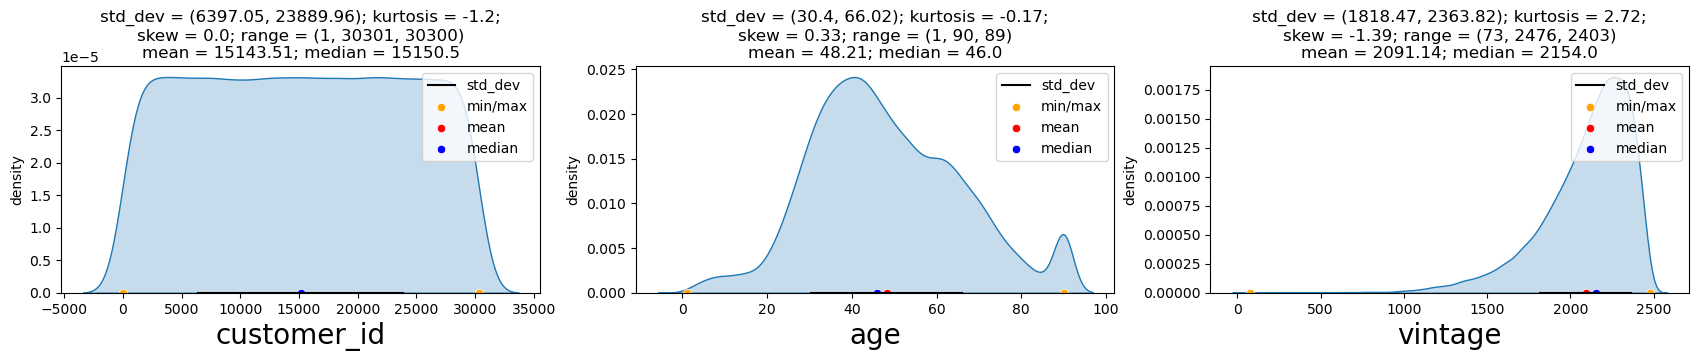

In [22]:
UVA_numeric(data,customer_details)

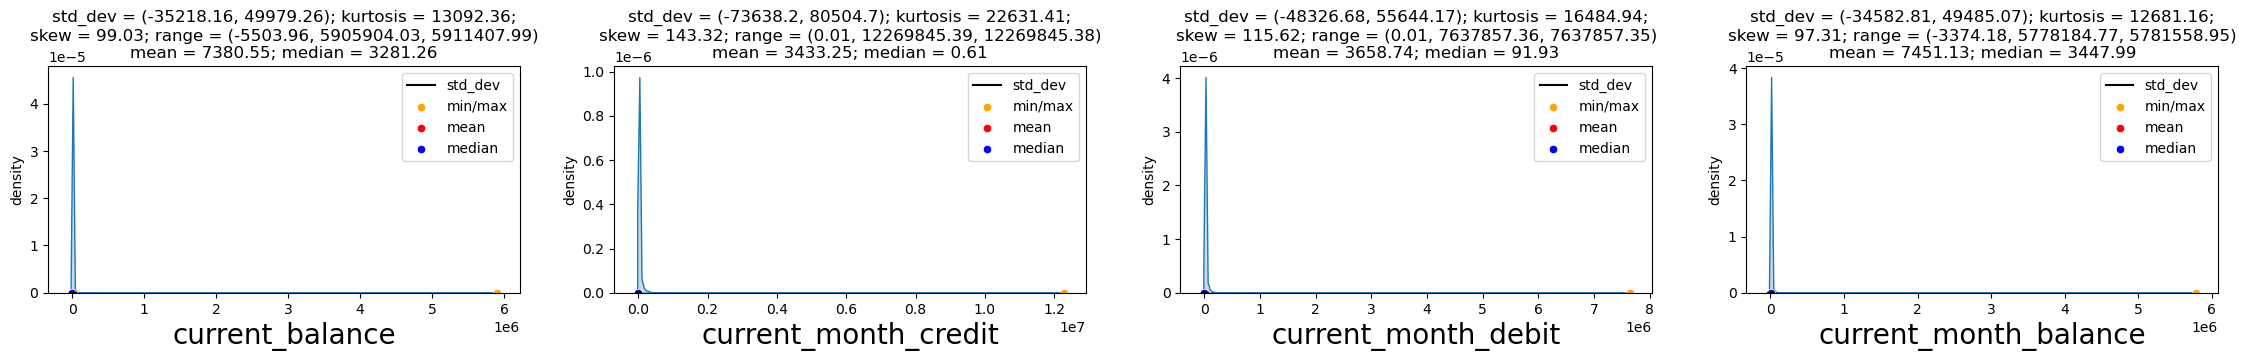

In [23]:
#current month

UVA_numeric(data,current_month)

In [24]:
#removing outliers to view data

factor=1
cm_data=data[current_month]
#filtering using standard deviation(not considering observations >3* standard deviation)
cm_data=cm_data[cm_data['current_balance']< factor*cm_data['current_balance'].std()]
cm_data=cm_data[cm_data['current_month_credit']< factor*cm_data['current_month_credit'].std()]
cm_data=cm_data[cm_data['current_month_debit']< factor*cm_data['current_month_debit'].std()]
cm_data=cm_data[cm_data['current_month_balance']< factor*cm_data['current_month_balance'].std()]

#checking how many points removed
len(data),len(cm_data)

(28382, 18884)

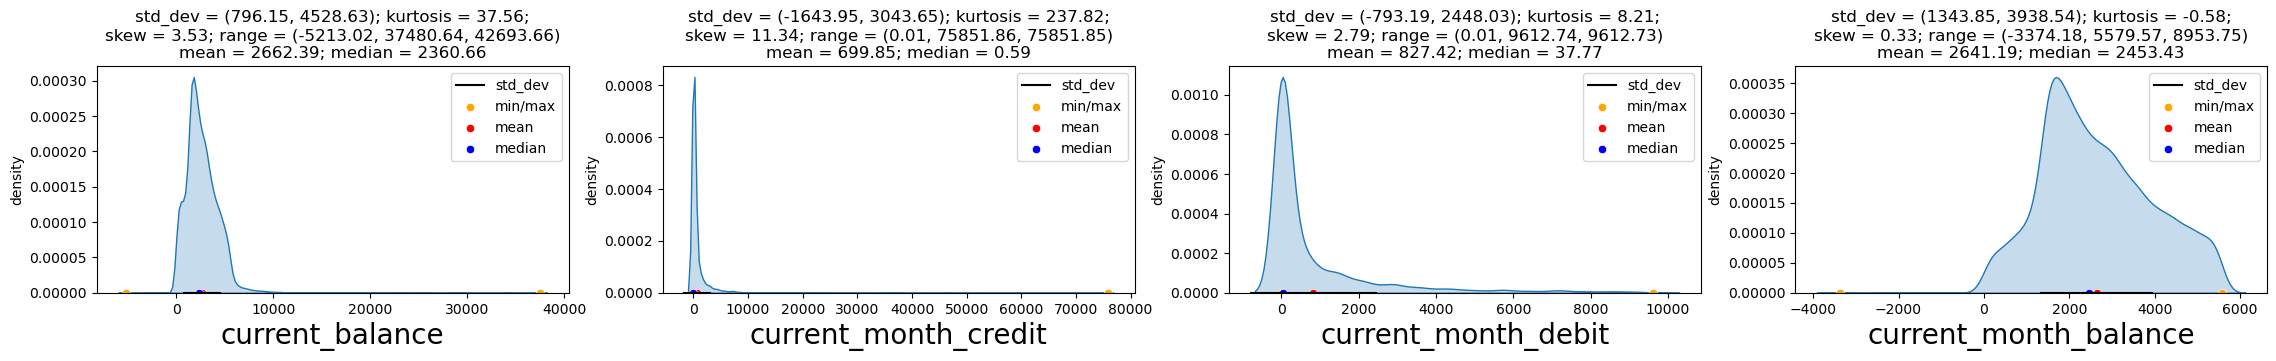

In [25]:
UVA_numeric(cm_data,current_month)

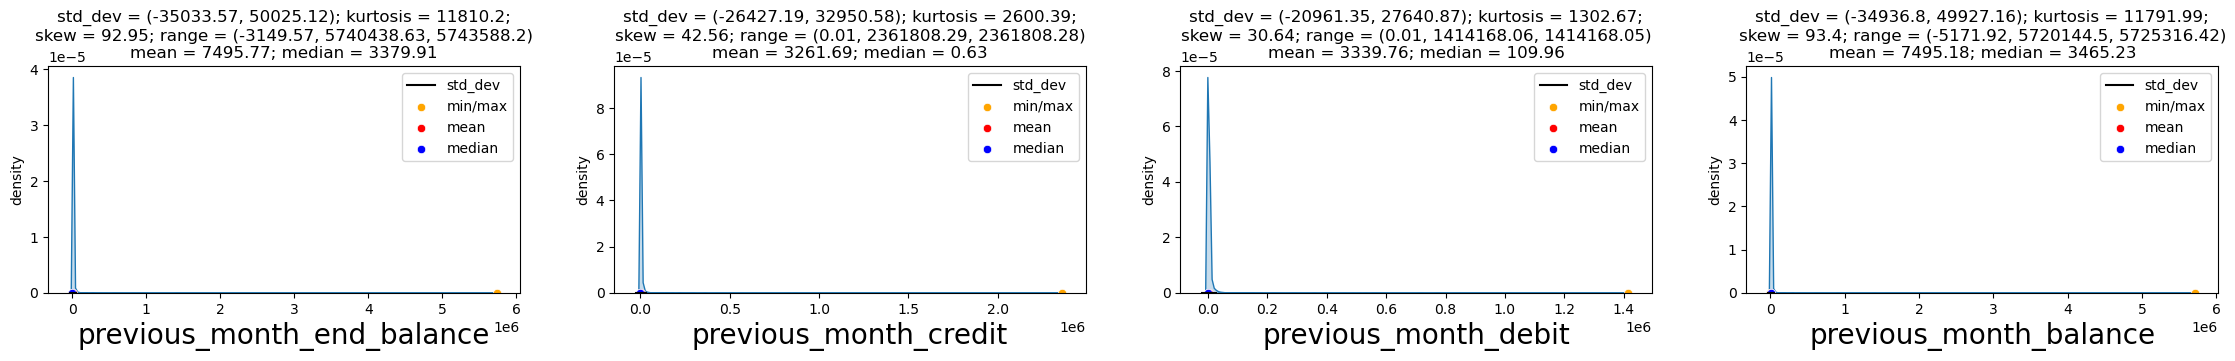

In [26]:
UVA_numeric(data,previous_month)

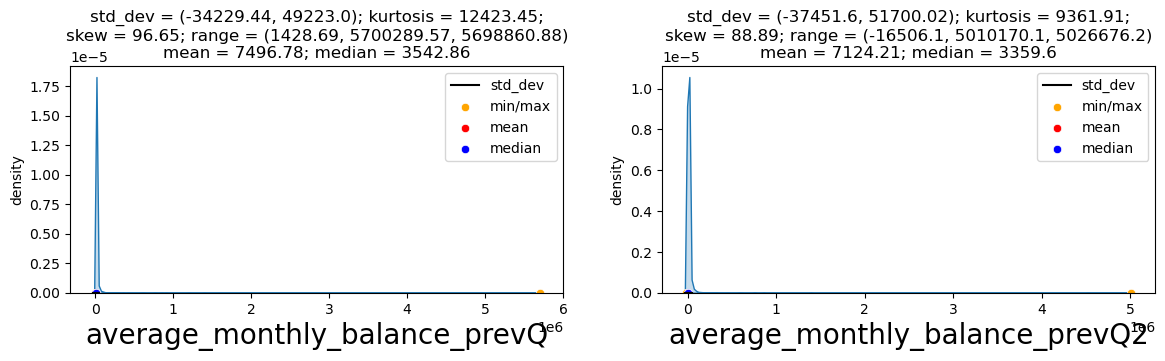

In [27]:
UVA_numeric(data,previous_quarters)

In [28]:
pd.to_datetime(data['last_transaction']).min(),pd.to_datetime(data['last_transaction']).max()

(Timestamp('2018-12-31 00:00:00'), Timestamp('2019-12-31 00:00:00'))

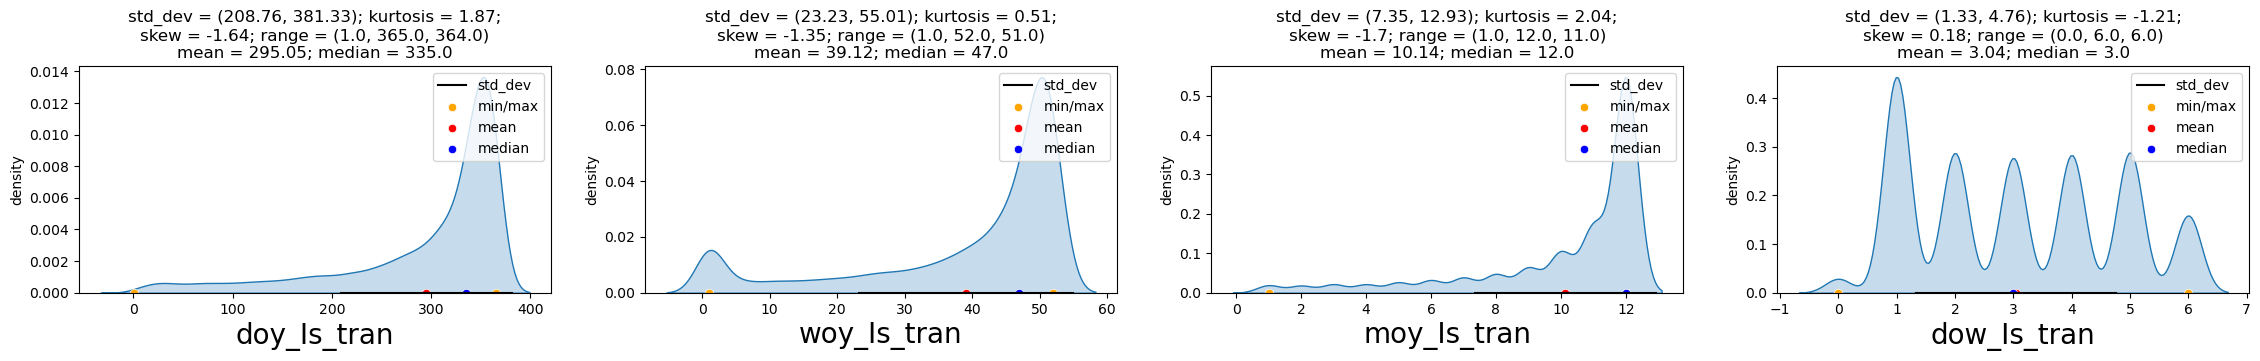

In [29]:
UVA_numeric(data,transaction_date)

# Univarate analysis : categorical variables


In [18]:
data.select_dtypes(exclude=['int64','float','Int64']).dtypes

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
last_transaction          object
dtype: object

In [19]:
def UVA_category(data,var_group):
    #setting figure style
    size=len(var_group)
    plt.figure(figsize=(7*size,5),dpi=100)
    #for every variable
    for j,i in enumerate(var_group):
        norm_count=data[i].value_counts(normalize=True)
        n_uni=data[i].nunique()
        #plotting variable with every info
        plt.subplot(1,size,j+1)
        sns.barplot(norm_count,norm_count.index,order=norm_count.index)
        plt.xlabel('percent/fraction',fontsize=20)
        plt.ylabel('{}'.format(i),fontsize=20)
        plt.title('n_uniques={} \n value counts \n {};'.format(n_uni,norm_count))

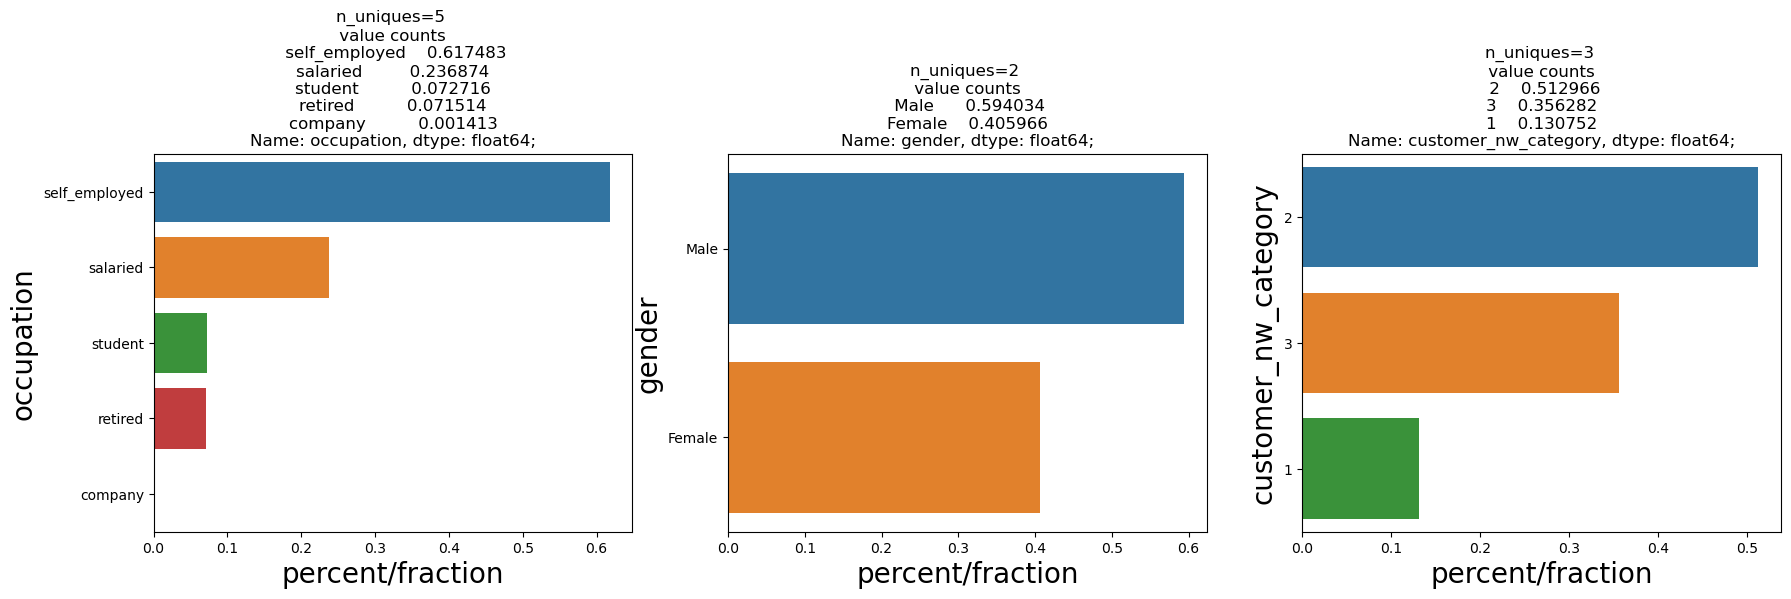

In [32]:
UVA_category(data,['occupation','gender','customer_nw_category'])

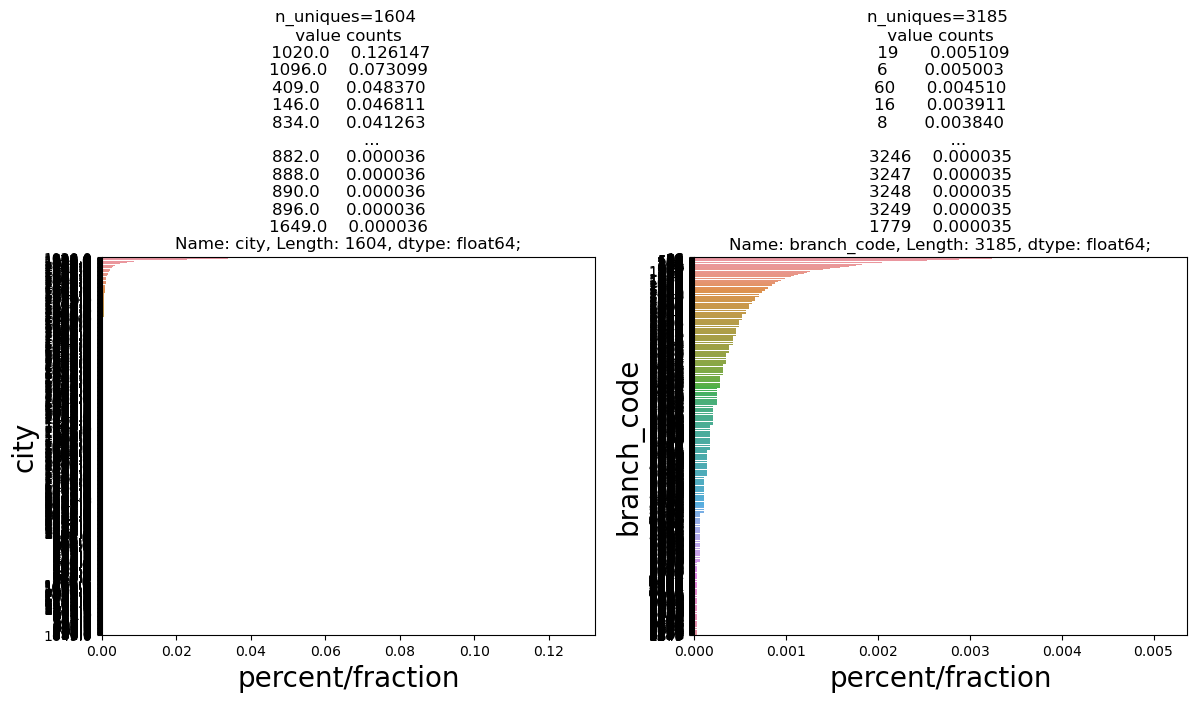

In [33]:
UVA_category(data,['city','branch_code'])

(0.0, 0.02)

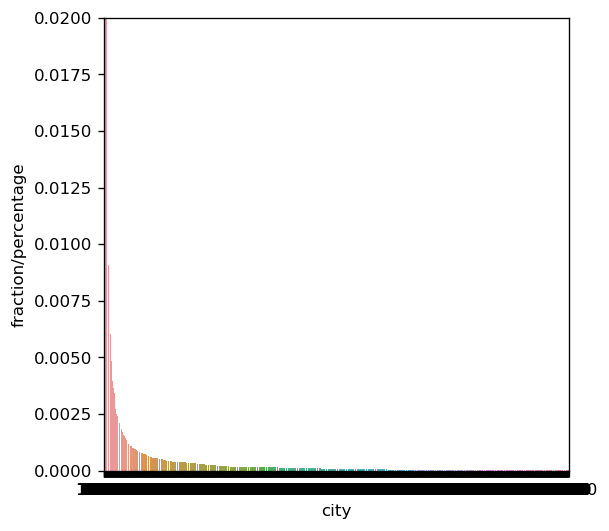

In [34]:
#plotting "city"
plt.figure(figsize=(5,5),dpi=120)
city_count=data['city'].value_counts(normalize=True)
sns.barplot(city_count.index,city_count,order=city_count.index)
plt.xlabel('city')
plt.ylabel('fraction/percentage')
plt.ylim(0,0.02)

Text(0, 0.5, 'fraction/percentage')

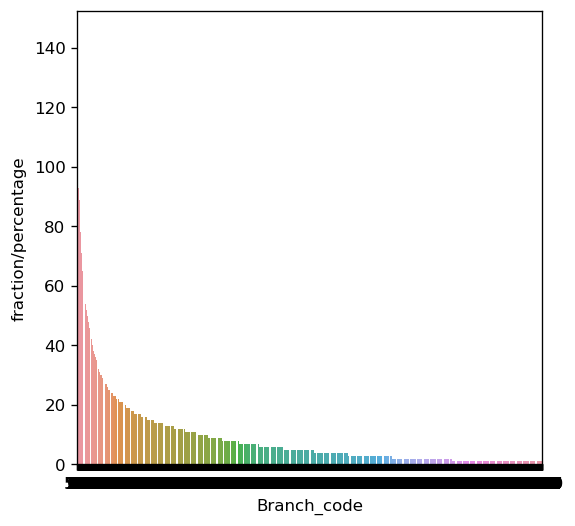

In [35]:
#plotting branch code
plt.figure(figsize=(5,5),dpi=120)
branch_count=data['branch_code'].value_counts()
sns.barplot(branch_count.index,branch_count,order=branch_count.index)
plt.xlabel('Branch_code')
plt.ylabel('fraction/percentage')


# Churn

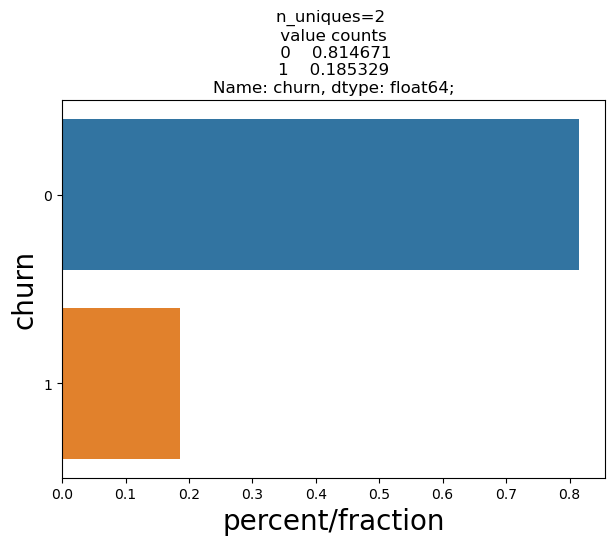

In [38]:
UVA_category(data,['churn'])

In [39]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
doy_Is_tran                       3223
woy_Is_tran                       3223
moy_Is_tran                       3223
dow_Is_tran                       3223
dtype: int64

# Univarate Analysis: Outliers

In [20]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

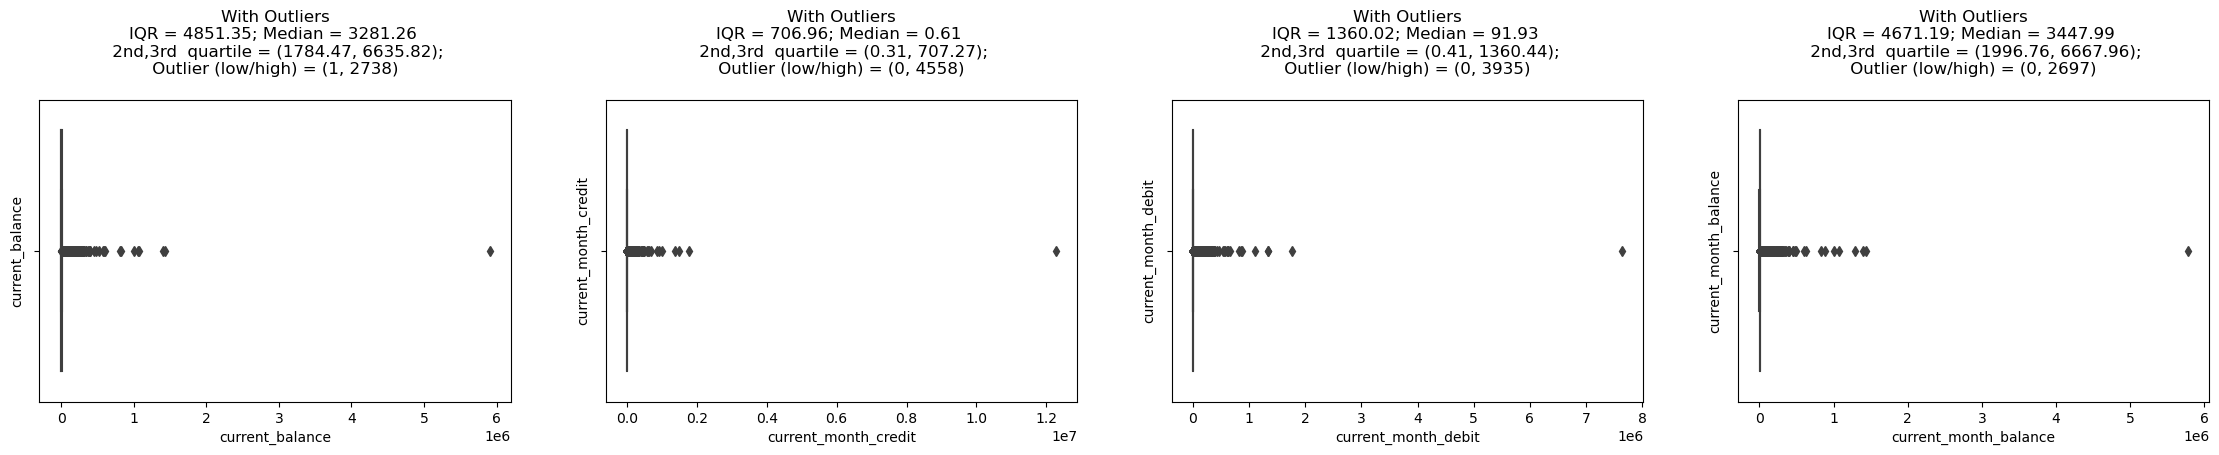

In [41]:
UVA_outlier(data,current_month,)

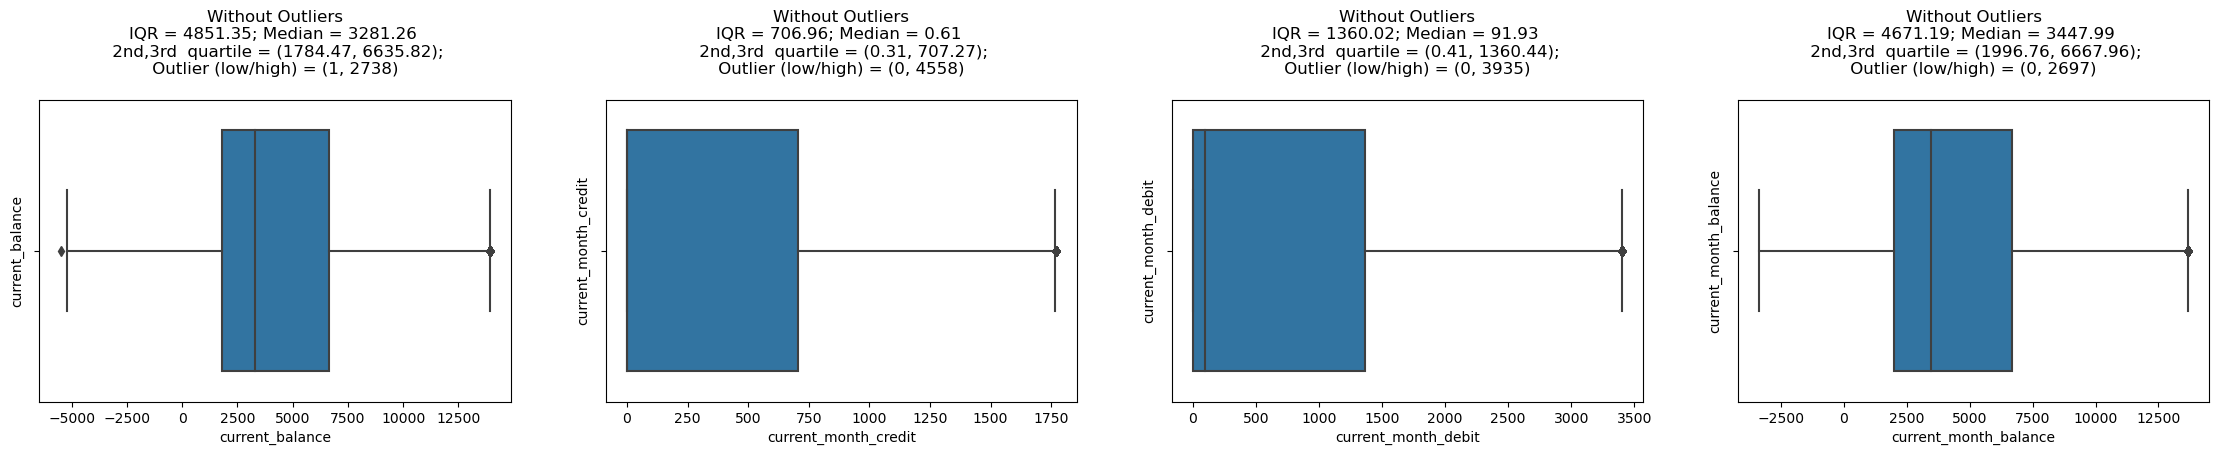

In [42]:
UVA_outlier(data,current_month,include_outlier=False)

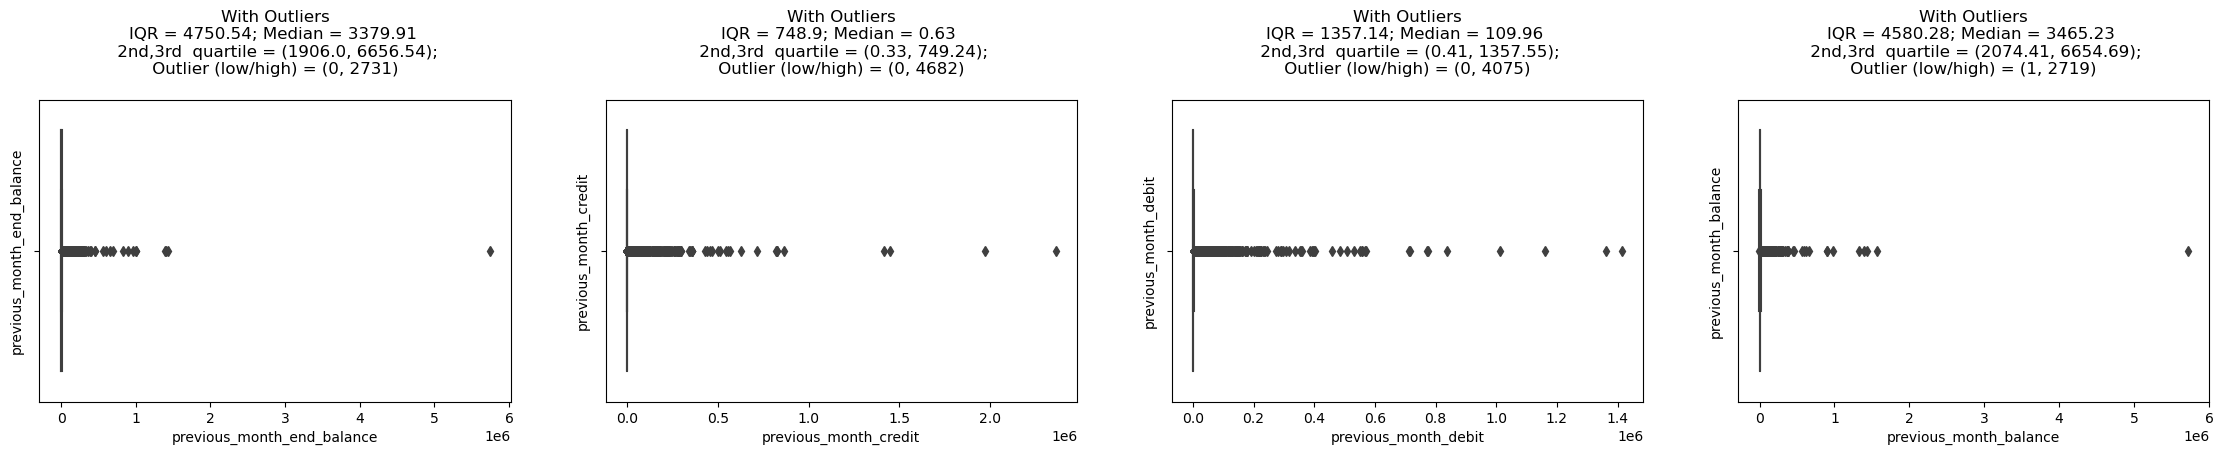

In [43]:
UVA_outlier(data,previous_month)

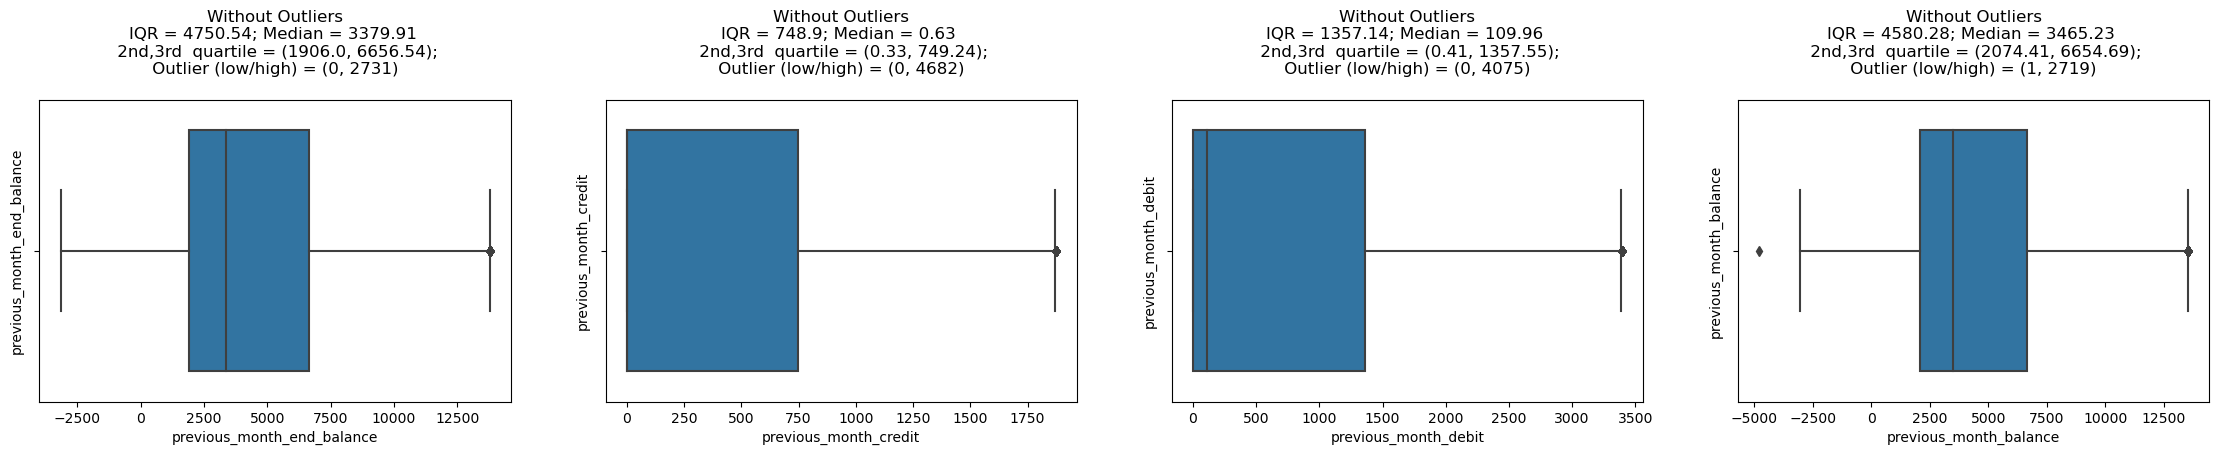

In [44]:
UVA_outlier(data,previous_month,include_outlier=False)

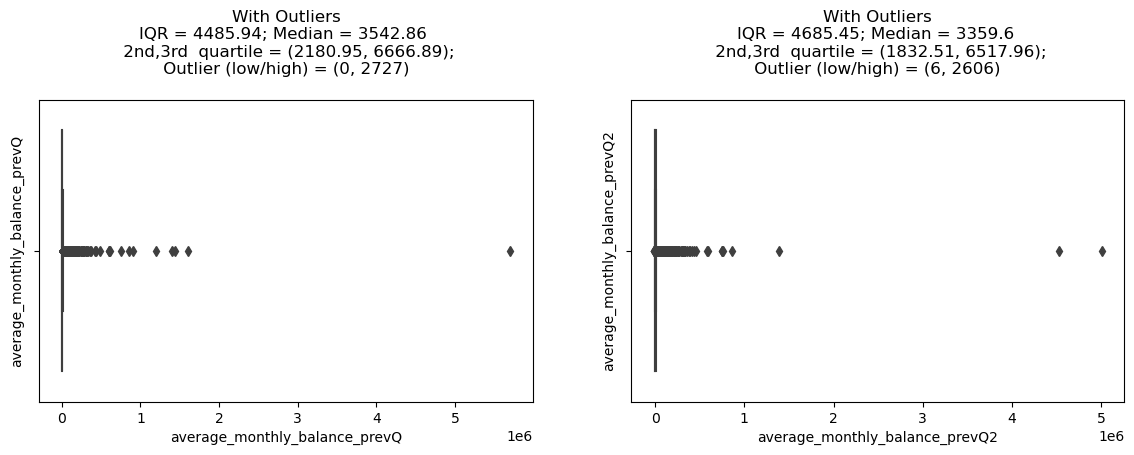

In [45]:
#previous quarter
UVA_outlier(data,previous_quarters)

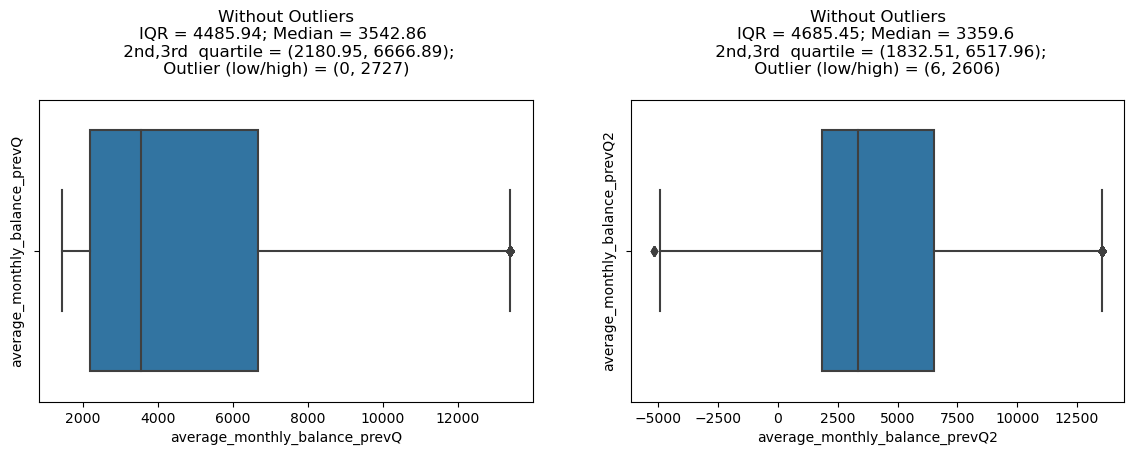

In [46]:
UVA_outlier(data,previous_quarters, include_outlier=False)

# Bivariate analysis(numerical-numerical)

In [21]:
#isolating numerical datatypes
numerical=data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_Is_tran                       float64
woy_Is_tran                       float64
moy_Is_tran                       float64
dow_Is_tran                       float64
dtype: object

# Correlation Matrix

In [48]:
numerical.corr()

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_Is_tran,woy_Is_tran,moy_Is_tran,dow_Is_tran
customer_id,1.000000,-0.007750,-0.000442,-0.008616,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.010550,0.007208,-0.009882,0.008990
vintage,-0.007750,1.000000,0.006220,0.005192,0.000031,-0.000669,-0.002054,-0.001759,-0.004617,-0.000169,-0.004978,-0.006760,-0.000550,-0.002208,-0.004435,-0.012589,-0.005372,-0.008596
age,-0.000442,0.006220,1.000000,-0.000612,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,0.016642,0.003852,0.017257,-0.017958
dependents,-0.008616,0.005192,-0.000612,1.000000,-0.003070,0.000216,0.001213,0.002949,0.003260,0.025054,0.008207,0.032021,-0.000652,0.001239,0.079740,0.034460,0.077978,-0.001702
current_balance,0.006589,0.000031,0.054346,-0.003070,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,0.019978,-0.000374,0.019094,0.003441
previous_month_end_balance,0.005819,-0.000669,0.058342,0.000216,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.014381,0.003973,0.014125,0.004301
average_monthly_balance_prevQ,0.004485,-0.002054,0.061708,0.001213,0.958307,0.970530,1.000000,0.763495,0.033639,0.085699,0.060579,0.121272,0.976290,0.994038,0.012688,0.002552,0.012721,0.003469
average_monthly_balance_prevQ2,-0.002532,-0.001759,0.059607,0.002949,0.714600,0.722998,0.763495,1.000000,0.036271,0.062264,0.045239,0.102519,0.725826,0.736635,0.006363,-0.012678,0.005499,-0.002391
current_month_credit,0.002494,-0.004617,0.023840,0.003260,0.030371,0.032493,0.033639,0.036271,1.000000,0.168561,0.937021,0.135729,0.034182,0.038254,0.033129,0.010479,0.031521,0.000947
previous_month_credit,-0.006414,-0.000169,0.029961,0.025054,0.061754,0.114222,0.085699,0.062264,0.168561,1.000000,0.165092,0.733953,0.085320,0.108496,0.071645,0.019146,0.068229,-0.007766


In [22]:
c=numerical.corr().abs()
s=c.unstack()
so=s.sort_values(kind="quicksort",ascending=False)
so=pd.DataFrame(so,columns=['Pearson Correlation'])

In [23]:
so[so['Pearson Correlation']<1].head(20)

Pearson Correlation
doy_Is_tran                   moy_Is_tran                               0.994550
moy_Is_tran                   doy_Is_tran                               0.994550
average_monthly_balance_prevQ previous_month_balance                    0.994038
previous_month_balance        average_monthly_balance_prevQ             0.994038
current_balance               current_month_balance                     0.983412
current_month_balance         current_balance                           0.983412
                              average_monthly_balance_prevQ             0.976290
average_monthly_balance_prevQ current_month_balance                     0.976290
previous_month_end_balance    current_month_balance                     0.974714
current_month_balance         previous_month_end_balance                0.974714
previous_month_end_balance    average_monthly_balance_prevQ             0.970530
average_monthly_balance_prevQ previous_month_end_balance                0.970530
previous_month_balance        previous_month_end_balance                0.969605
previous_month_end_balance    previous_month_balance                    0.969605
current_month_balance         previous_month_balance                    0.963276
previous_month_balance        current_month_balance                     0.963276
current_balance               average_monthly_balance_prevQ             0.958307
average_monthly_balance_prevQ current_balance                           0.958307
current_balance               previous_month_end_balance                0.947276
previous_month_end_balance    current_balance                           0.947276

# Heatmap

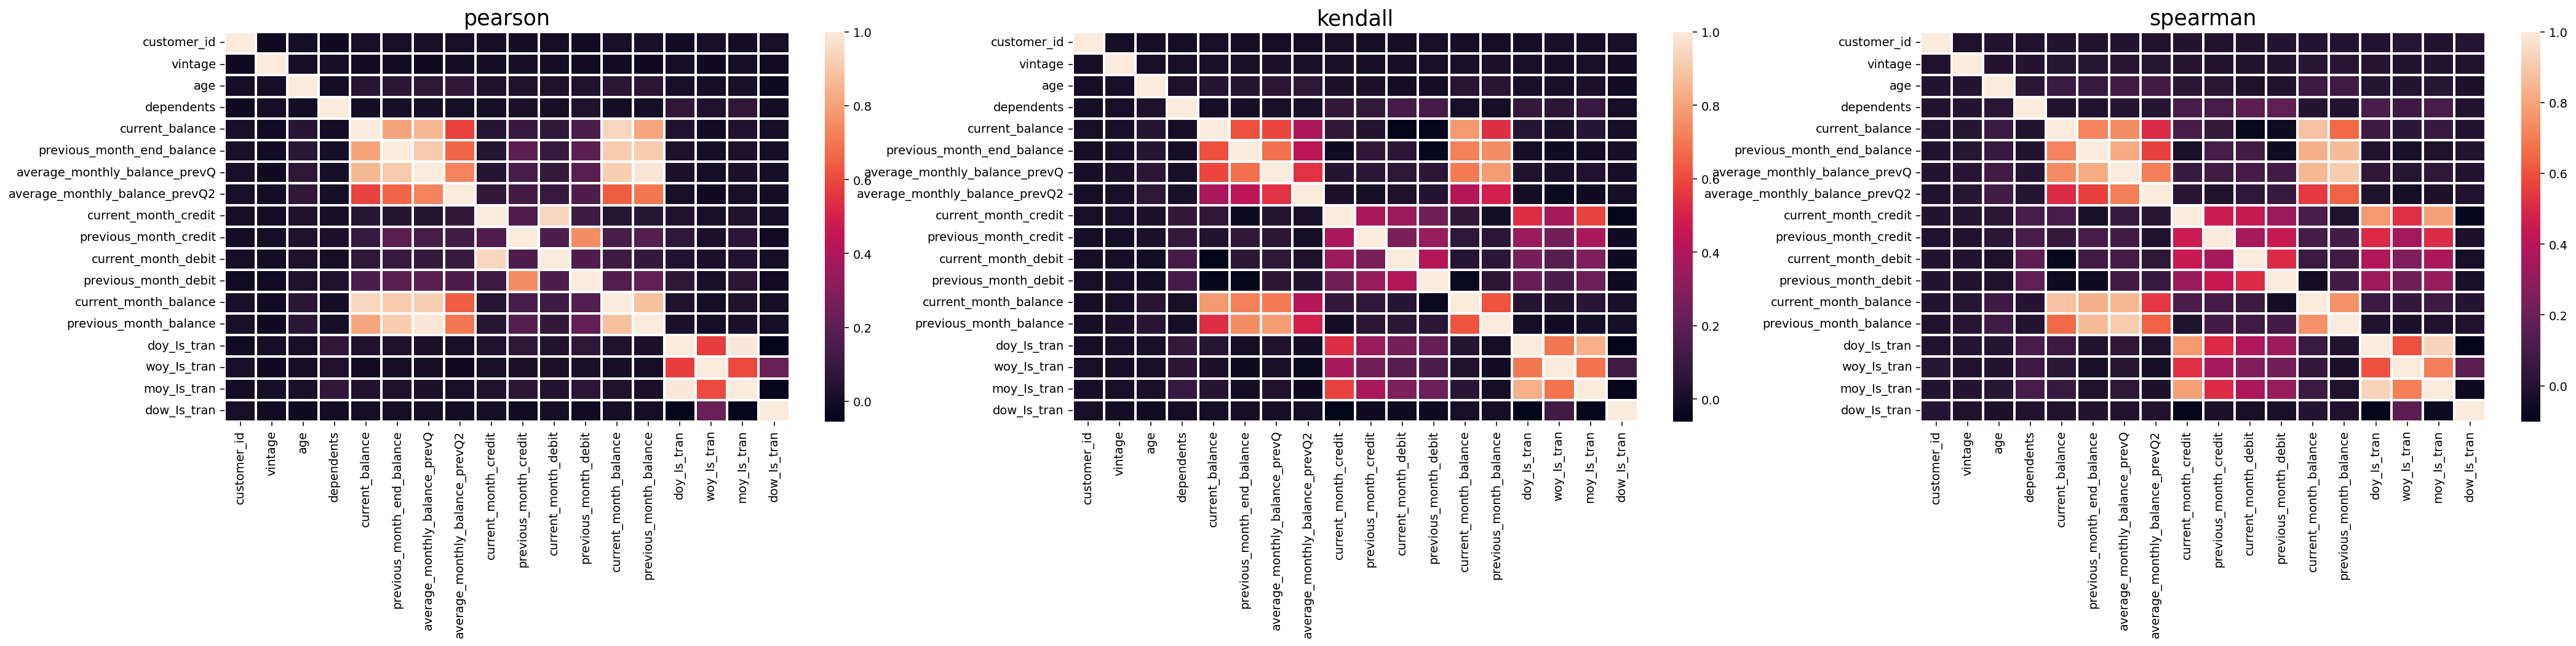

In [51]:
#plotting heatmap using all methods for all numerical variables
plt.figure(figsize=(36,6),dpi=140)
for j,i in enumerate (['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation = numerical.dropna().corr(method=i)
    sns.heatmap(correlation,linewidth=2)
    plt.title(i,fontsize=18)

In [24]:
#extracting transaction info of current and previous month
var=[]
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarters)

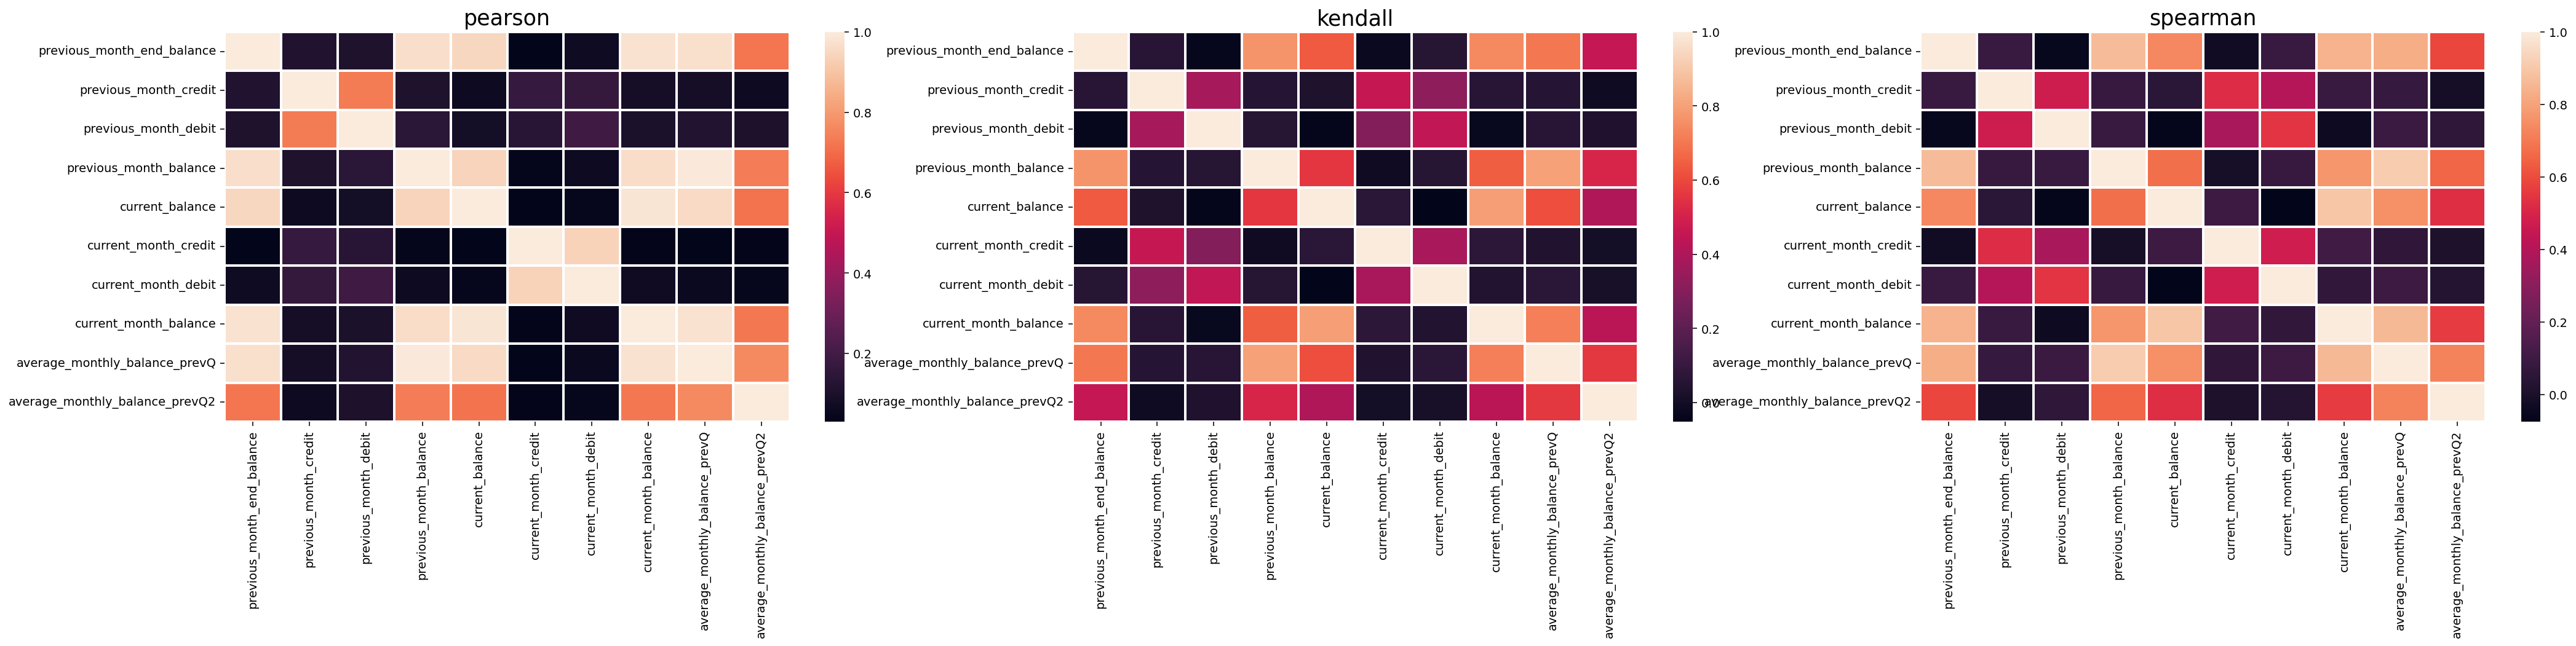

In [53]:
#plotting heatmap using all 3 correlation methods for all transactional variables
plt.figure(figsize=(36,6),dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation =numerical[var].dropna().corr(method=i)
    sns.heatmap(correlation,linewidth=2)
    plt.title(i,fontsize=18)

In [25]:
#grouping variables
transactions=['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']
balance=['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

In [ ]:
plt.figure(dpi=140)
sns.pairplot(numerical[transactions],plot_kws={'alpha':0.1})

In [ ]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

In [ ]:
#taking log of every value to negate outliers
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x))

In [ ]:
plt.figure(dpi=140)
sns.pairplot(numerical[transactions],plot_kws={'alpha':0.3})

In [ ]:
plt.figure(dpi=140)
sns.pairplot(numerical[balance],plot)

In [ ]:
data.head()

# BIVARIATE ANALYSIS [Continuous-continuous variables]

In [46]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [47]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [48]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.std()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

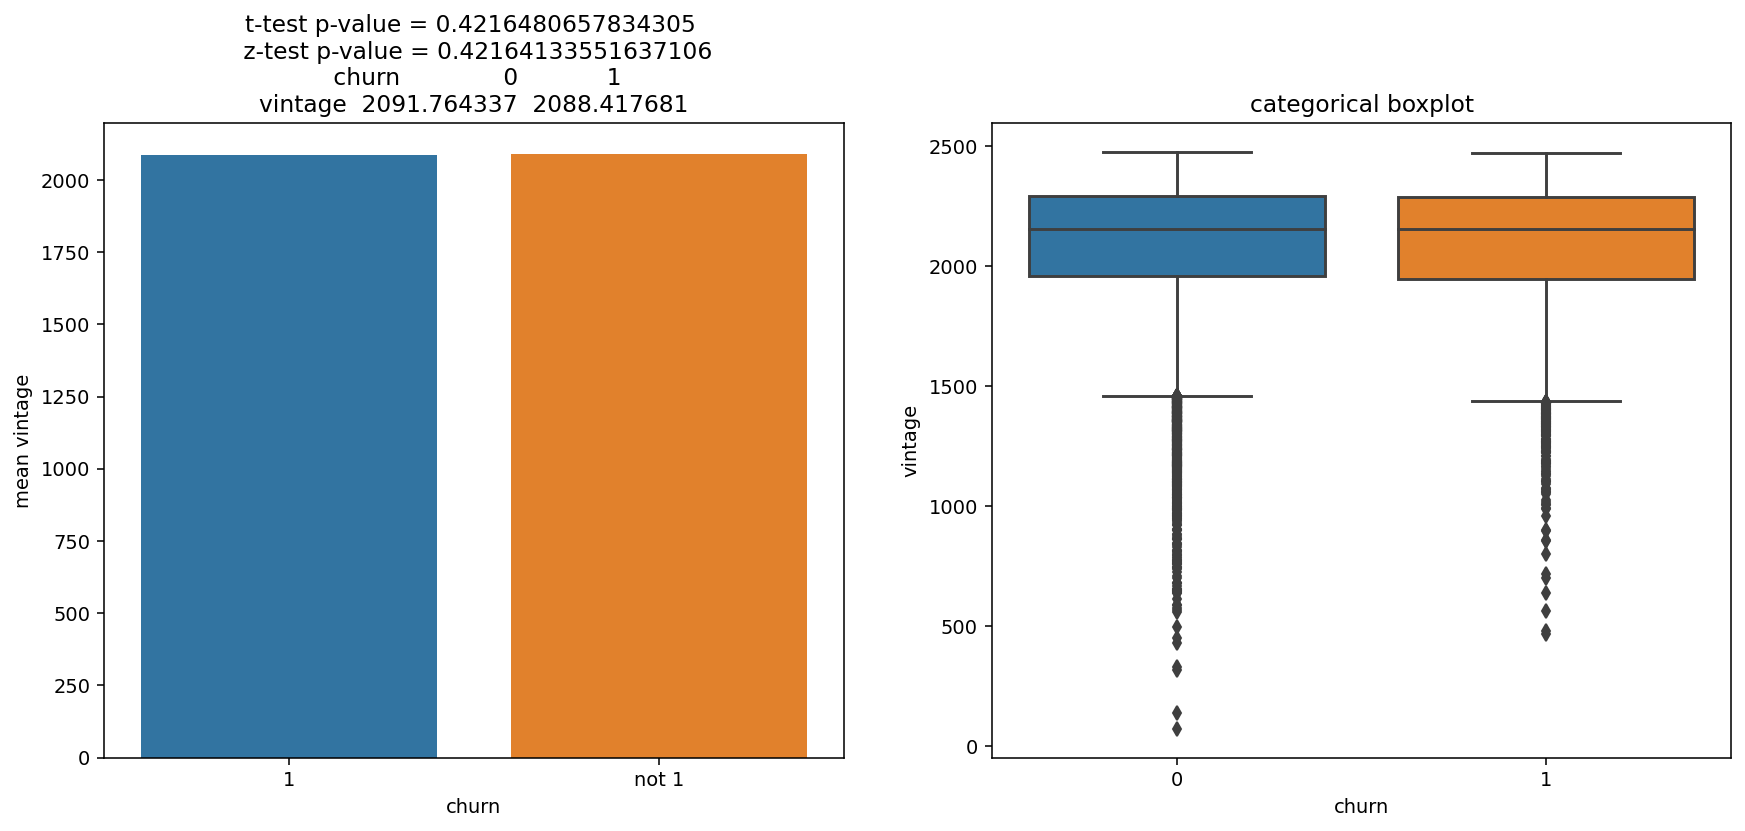

In [49]:
Bivariate_cont_cat(data, 'vintage', 'churn', 1)

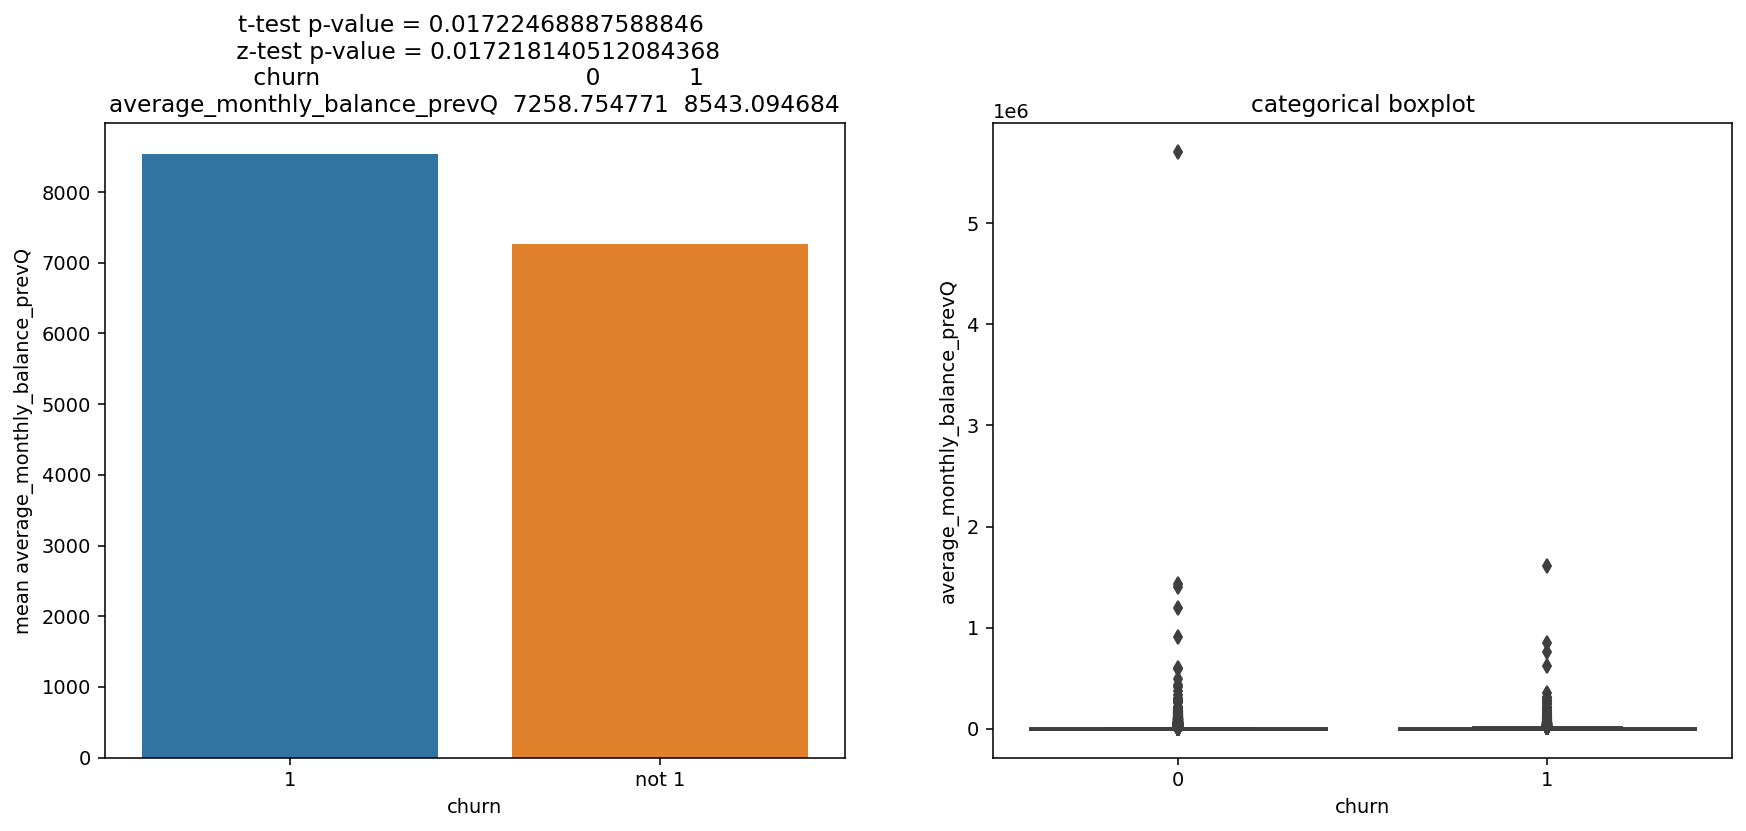

In [51]:
#Are cust with hig balance less likely to churn
Bivariate_cont_cat(data,'average_monthly_balance_prevQ','churn',1)

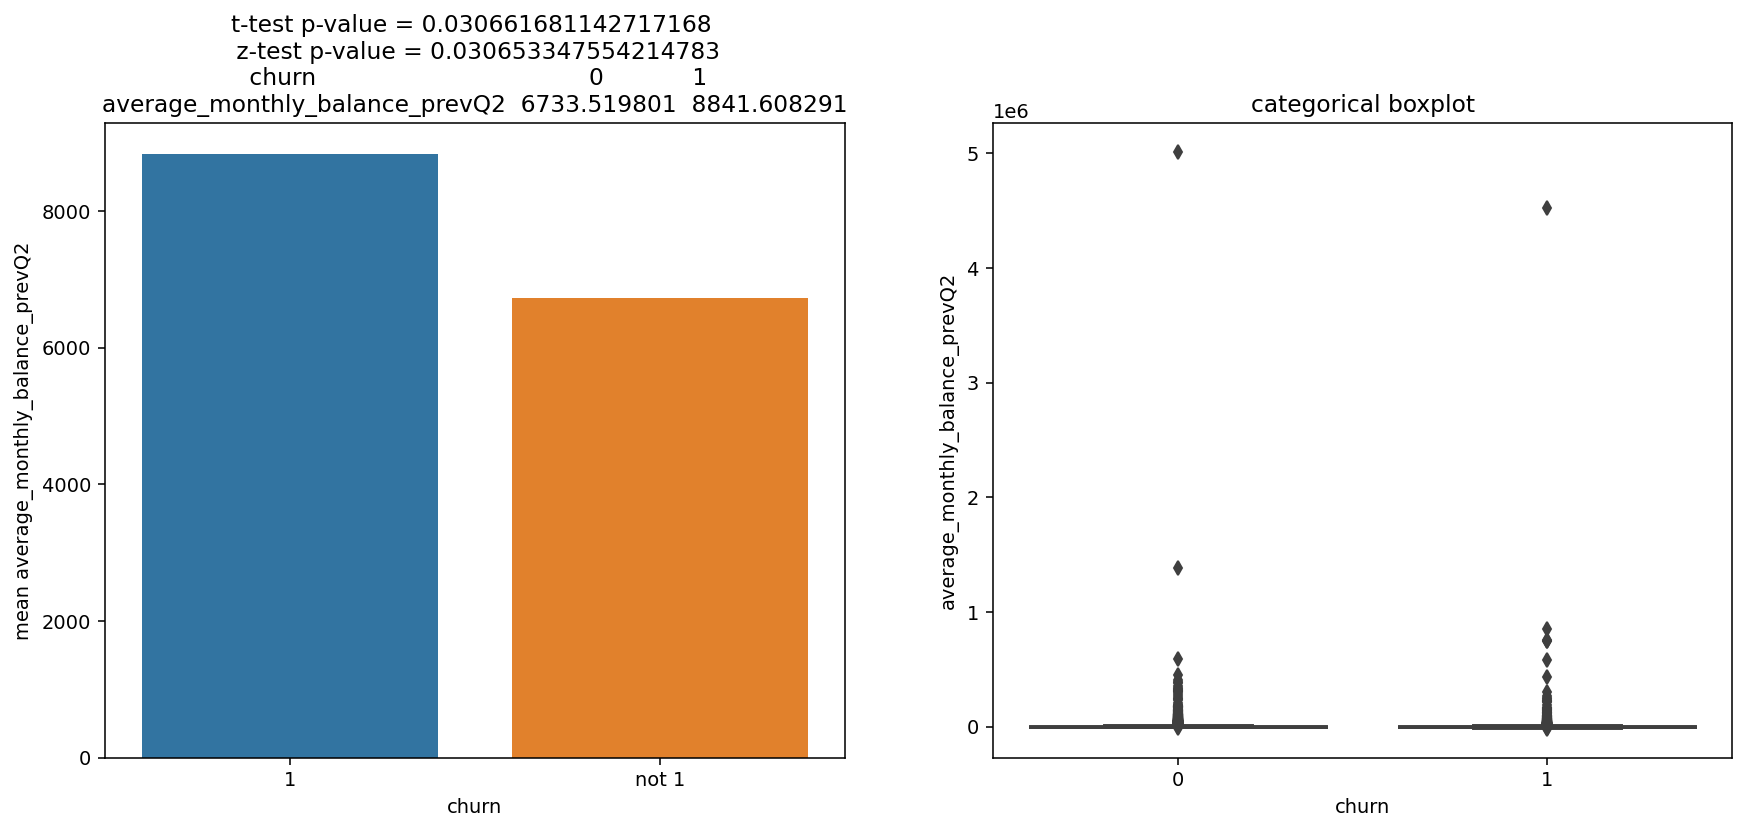

In [52]:
Bivariate_cont_cat(data,'average_monthly_balance_prevQ2','churn',1)

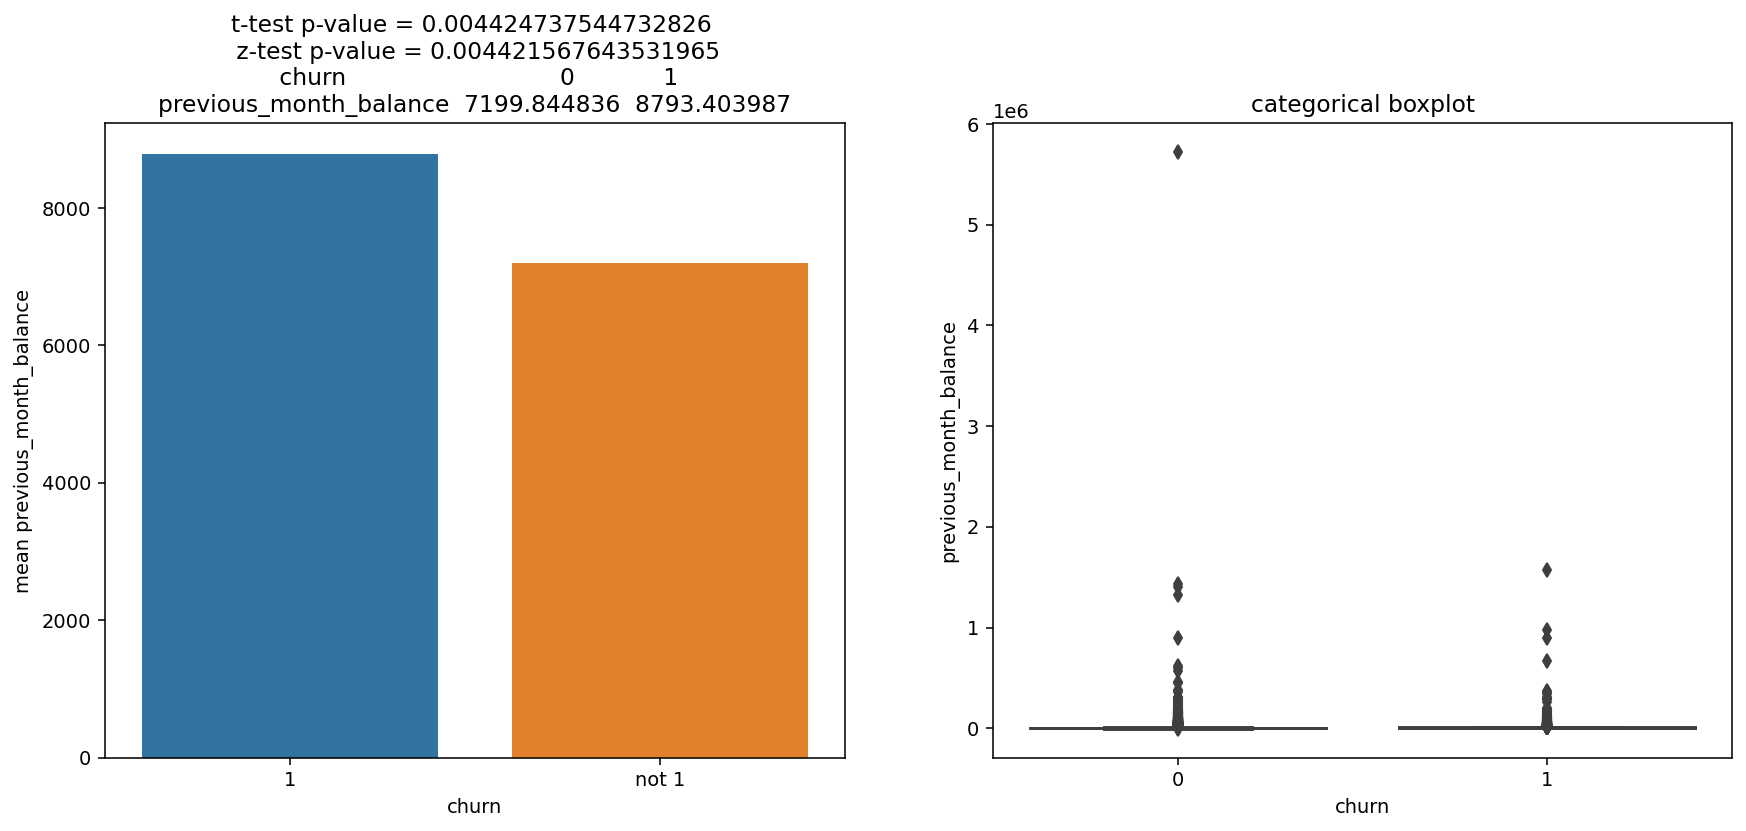

In [53]:
Bivariate_cont_cat(data,'previous_month_balance','churn',1)

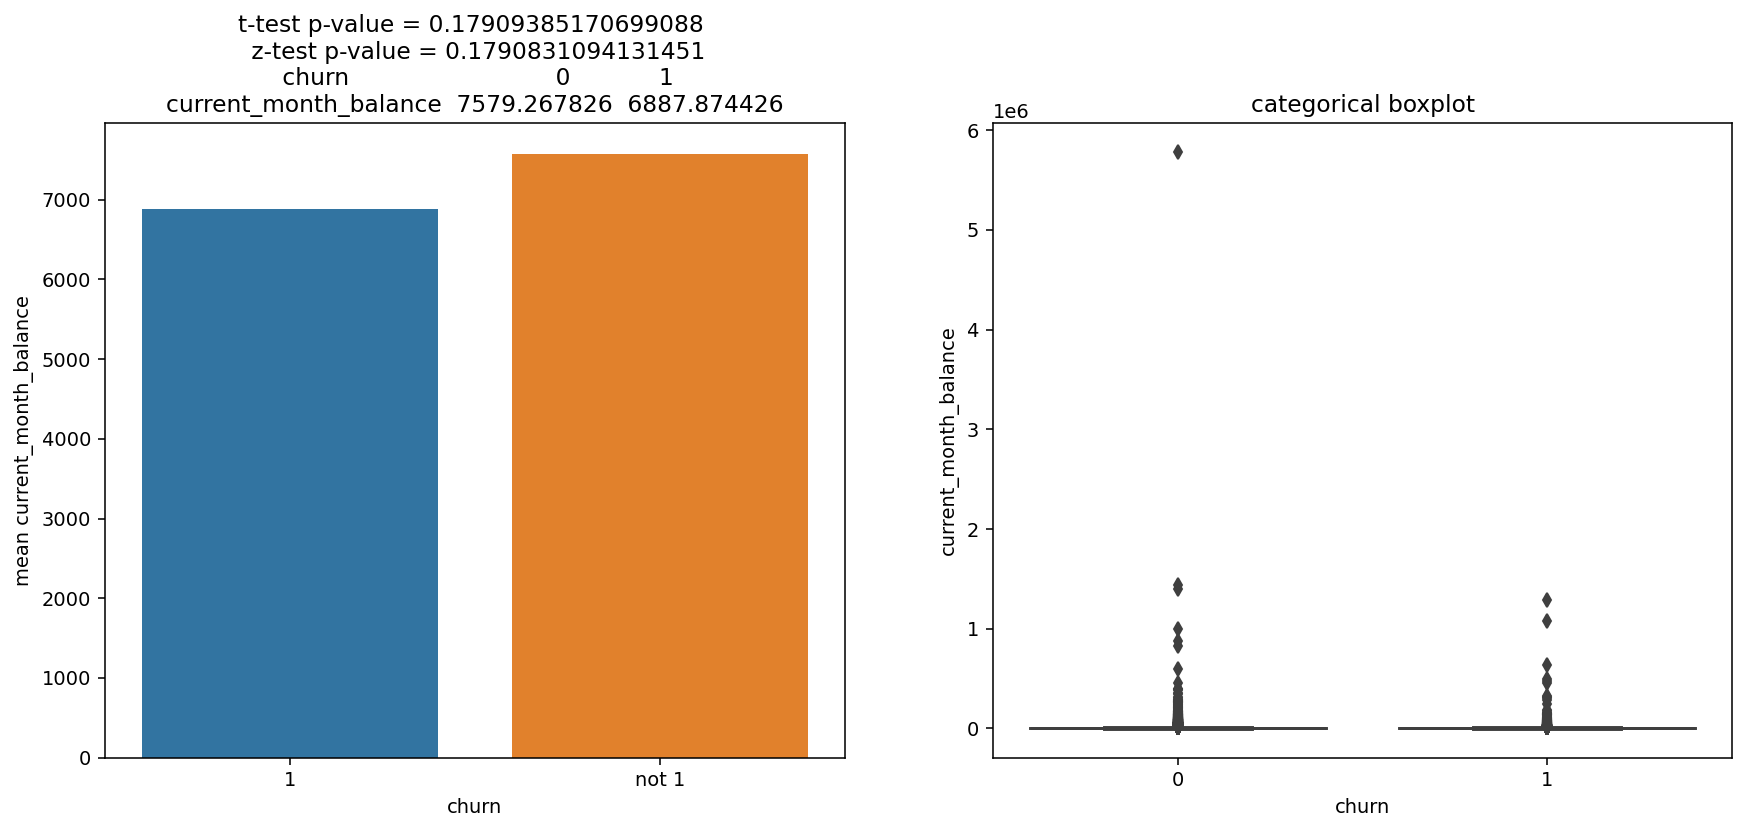

In [57]:
Bivariate_cont_cat(data,'current_month_balance','churn',1)

In [58]:
#Are cust dropping  monthy balance are highly likely to churn
difference = data[['churn','previous_month_balance','current_month_balance']][:]
difference['bal_diff']=difference['current_month_balance']- difference['previous_month_balance']

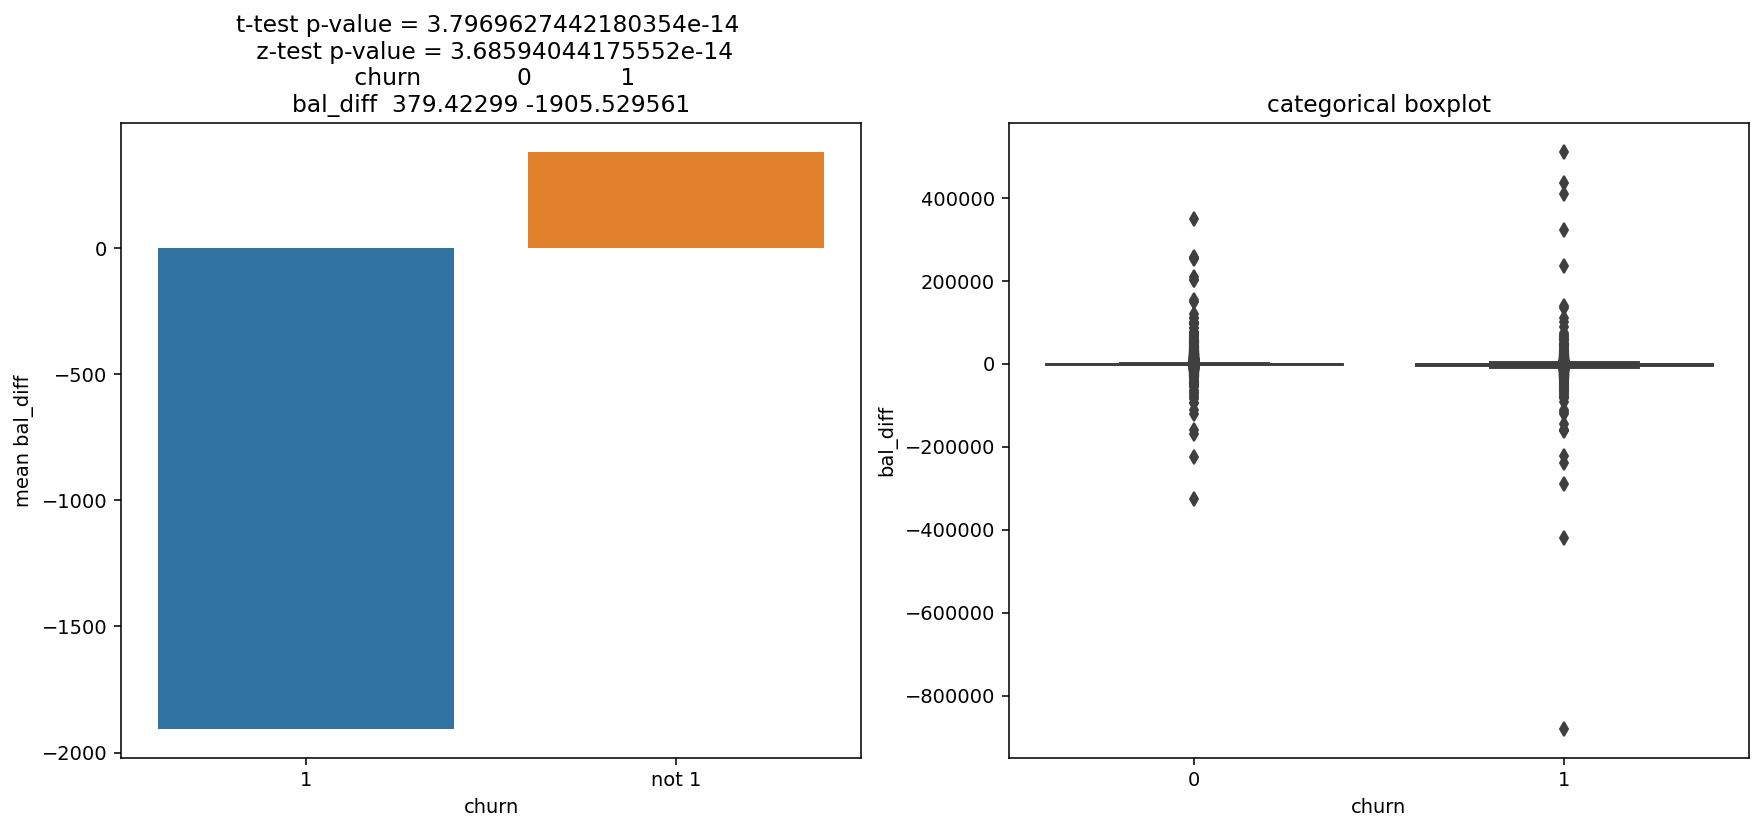

In [59]:
Bivariate_cont_cat(difference,'bal_diff','churn',1)

In [2]:
def BVA_categorical_plot(data, tar, cat):
    '''
    take data and two categorical variabales
    calculates the chi2 significance between the two variable
    and prints the result with countplot & CrossTab
    '''
    #isolating the variables 
    data= data[[cat,tar]][:]
    #forming a crosstab
    table= pd.crosstab(data[tar],data[cat],)
    f_obs= np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])
    #performing chi2 test
    from scipy.stats import chi2_contingency
    chi,p, dof, expected =chi2_contingency(f_obs)
    
    #checking whether results are significant
    if p<0.05:
        sig=True
    else:
            sig=False
    #plotting grouped plot
    sns.countplot(x=cat,hue=tar,data=data)
    plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))
    
    #plotting percent stacked bar plot
    #sns.catplot(ax,kind='stacked')
    axl = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
    axl.plot(kind='bar', stacked='True',title=str(axl))
    int_level = data[cat].value_counts()

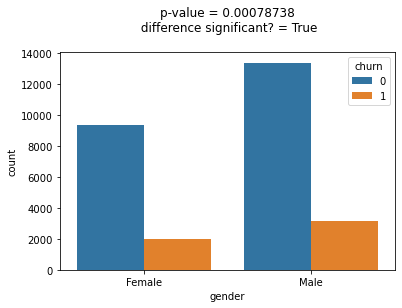

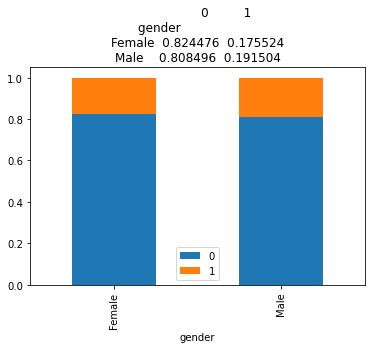

In [20]:
#Are females less likely to churn than males?

BVA_categorical_plot(data,'churn','gender')

In [22]:
#Are young customers more likely to churn?

churn= data[['churn','age']][:]
churn['age_group']= 'str'
churn['age_group'][churn['age']>=80]= 'very old'
churn['age_group'][(churn['age']<80)& (churn['age']>=60)] ='senior citizen'
churn['age_group'][(churn['age']<60)& (churn['age']>=18)] = 'adult'
churn['age_group'][churn['age']<18]='young'

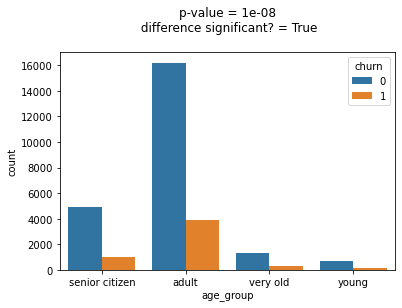

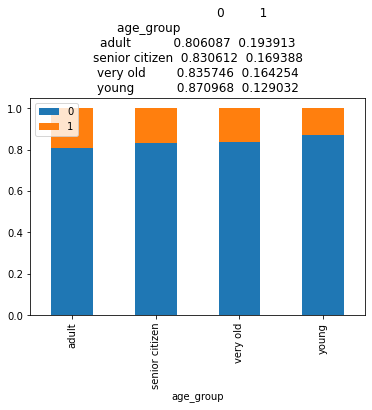

In [23]:
BVA_categorical_plot(churn,'churn','age_group')

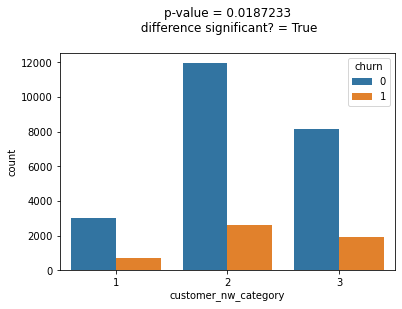

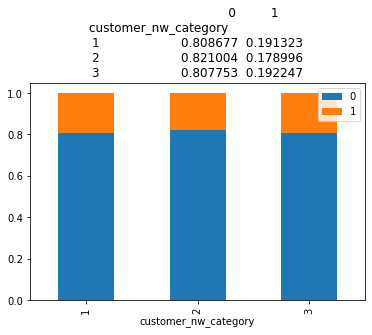

In [24]:
#Customers from low income bracket more likely to churn

BVA_categorical_plot(data,'churn','customer_nw_category')

In [26]:
#ARE customers with dependent less likely to churn

dependents= data[['churn','dependents']][:]
dependents.dropna()
dependents['dep_group'] = None
dependents['dep_group'][dependents['dependents']==0]= 'single'
dependents['dep_group'][(dependents['dependents']>=1)& (dependents['dependents']<=3)] = 'small family'
dependents['dep_group'][(dependents['dependents']>=4)& (dependents['dependents']<=9)] = 'large family'
dependents['dep_group'][(dependents['dependents']>=10)]='joint family'


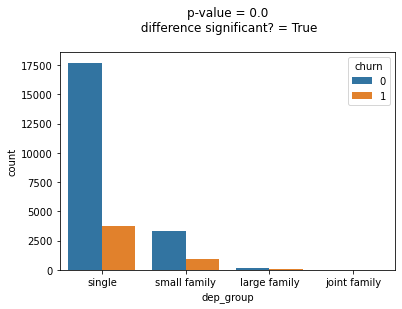

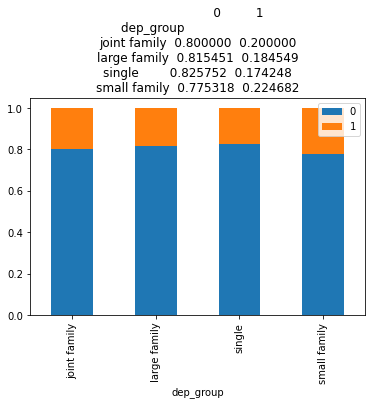

In [28]:
BVA_categorical_plot(dependents,'churn','dep_group')

In [30]:
#customers whose last transaction was more than 6 months ago they have higher churn rate?

transaction =data[['churn','moy_Is_tran']]
transaction['moy_Is_tran']= transaction['moy_Is_tran'].map(lambda x:'more than 6 months ago' if x<7 else 'within 6 months')

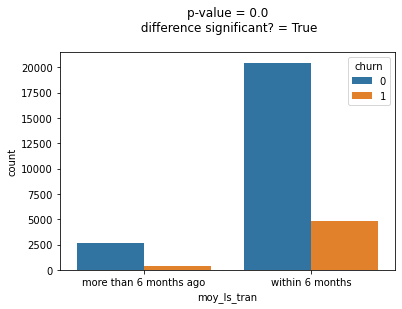

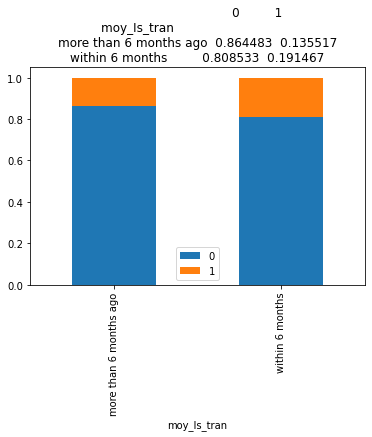

In [32]:
BVA_categorical_plot(transaction,'churn','moy_Is_tran')

In [33]:
#Possiblity that cities and branch code with very few accounts may lead to churning


#getting city codes which have less than 280 (1%) accounts
tmp=data['city'].value_counts()[:]
cities = tmp[tmp<280].index

In [34]:
churn_acc = data[['churn','city']][:]
churn_acc['city_cat'] = None
churn_acc['city_cat'][churn_acc['city'].isin(cities[:])] = 'low accounts'
churn_acc['city_cat'][~churn_acc['city'].isin(cities[:])] = 'high accounts'

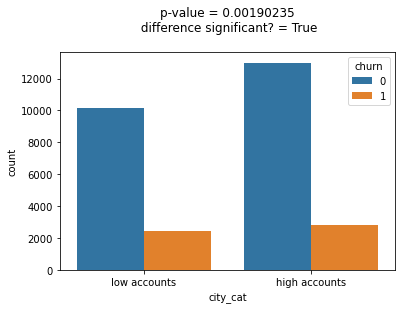

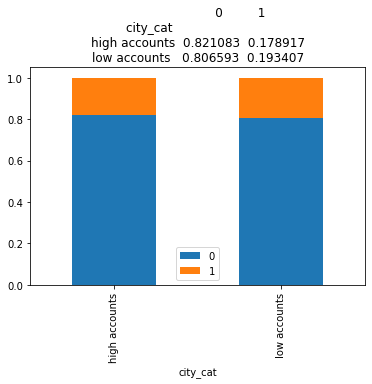

In [35]:
BVA_categorical_plot(churn_acc,'churn','city_cat')

In [39]:
tmp=data['branch_code'].value_counts()[:]
branch = tmp[tmp<140].index

In [40]:
churn_acc = data[['churn','branch_code']][:]
churn_acc['branch_cat'] = None
churn_acc['branch_cat'][churn_acc['branch_cat'].isin(branch[:])] = 'low accounts'
churn_acc['branch_cat'][~churn_acc['branch_cat'].isin(branch[:])] = 'high accounts'

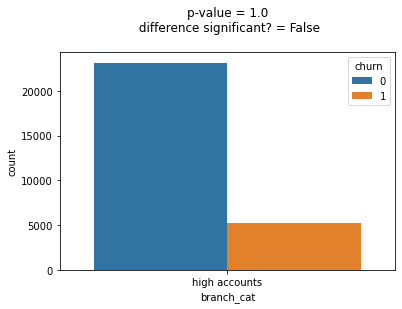

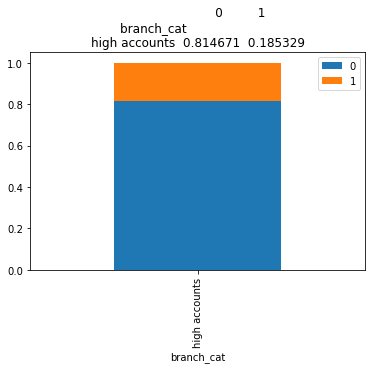

In [41]:
BVA_categorical_plot(churn_acc,'churn','branch_cat')

In [42]:
#isolating rows with missing gender
miss_gender=data[:]
miss_gender['missing_gender']='not missing'
miss_gender['missing_gender'][~miss_gender['gender'].isin(['Male','Female'])] = 'missing value'

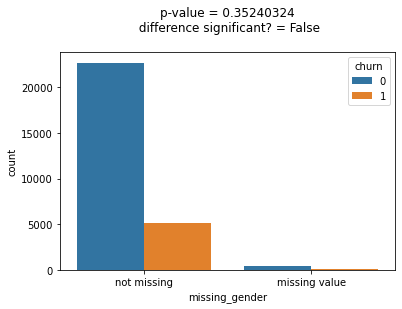

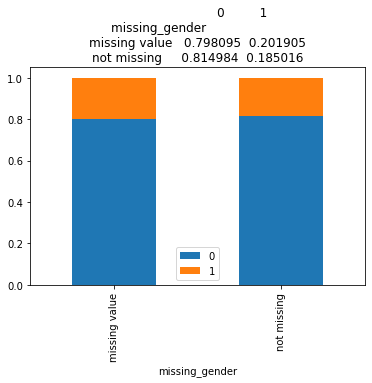

In [43]:
BVA_categorical_plot(miss_gender,'churn','missing_gender')

In [46]:
#MISSING VALUES : DEPENDENTS

#isolating rows with missing gender
miss_dependents=data[:]
miss_dependents['missing_dependents']='not missing'
miss_dependents['missing_dependents'][~miss_dependents['dependents'].isin([0, 2, 3, 1, 7, 4,
                                                                  6, 5, 9, 52, 36, 50,
                                                                  8, 25, 32])] = 'missing value'

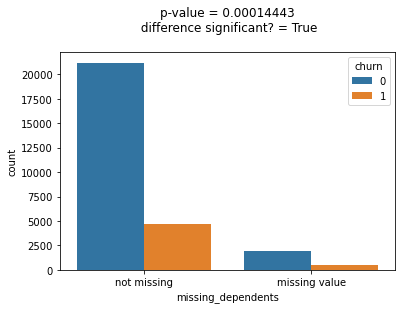

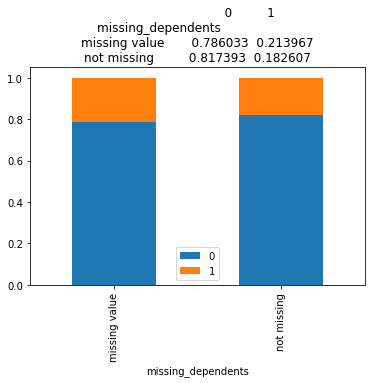

In [47]:
BVA_categorical_plot(miss_dependents,'churn','missing_dependents')

In [48]:
#MISSING VALUES : OCCUPATION

#isolating rows with missing occupation

miss_occupation=data[:]
miss_occupation['missing_occupation']='not missing'
miss_occupation['missing_occupation'][~miss_occupation['occupation'].isin(['self_employed',
                                                                          'salaried',
                                                                          'retired',
                                                                          'student',
                                                                          'company'])] = 'missing value'

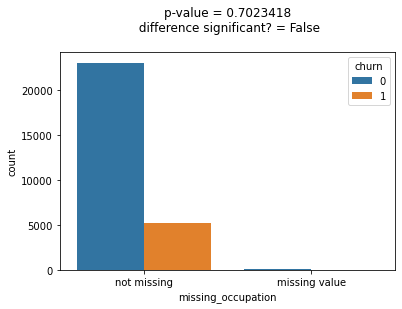

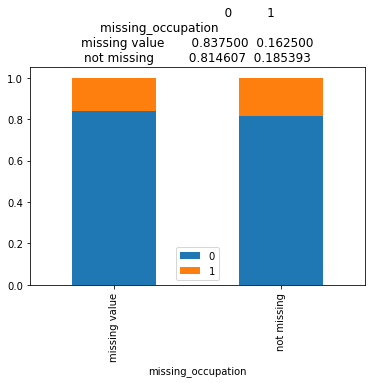

In [49]:
BVA_categorical_plot(miss_occupation, 'churn', 'missing_occupation')